In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://github.com/stedy/Machine-Learning-with-R-datasets/raw/master/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Axes: >

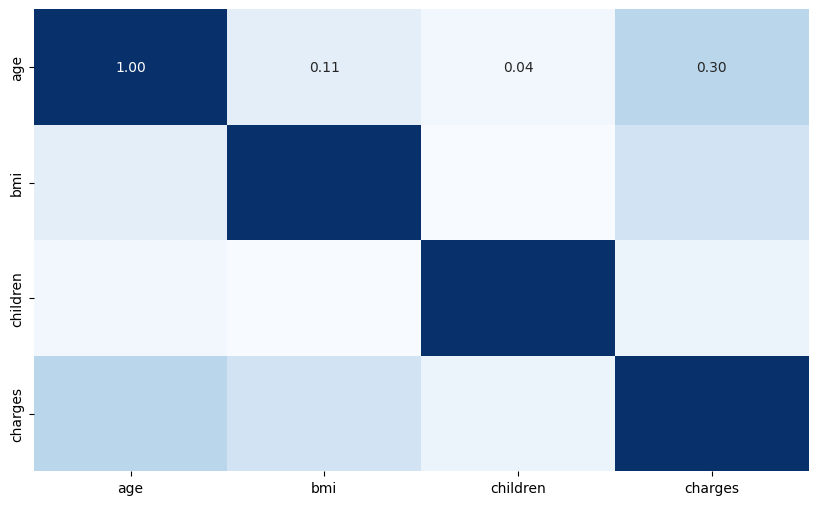

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
corr_df = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='Blues', cbar=None)

In [11]:
df_new = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_new

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


<Axes: >

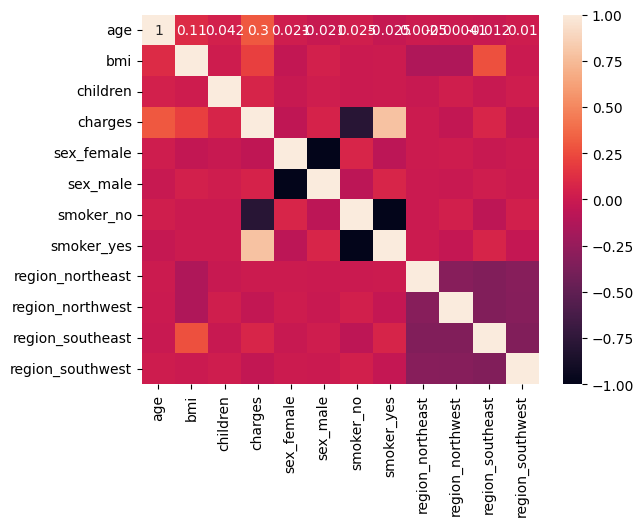

In [12]:
sns.heatmap(df_new.corr(), annot = True)

Feature selection

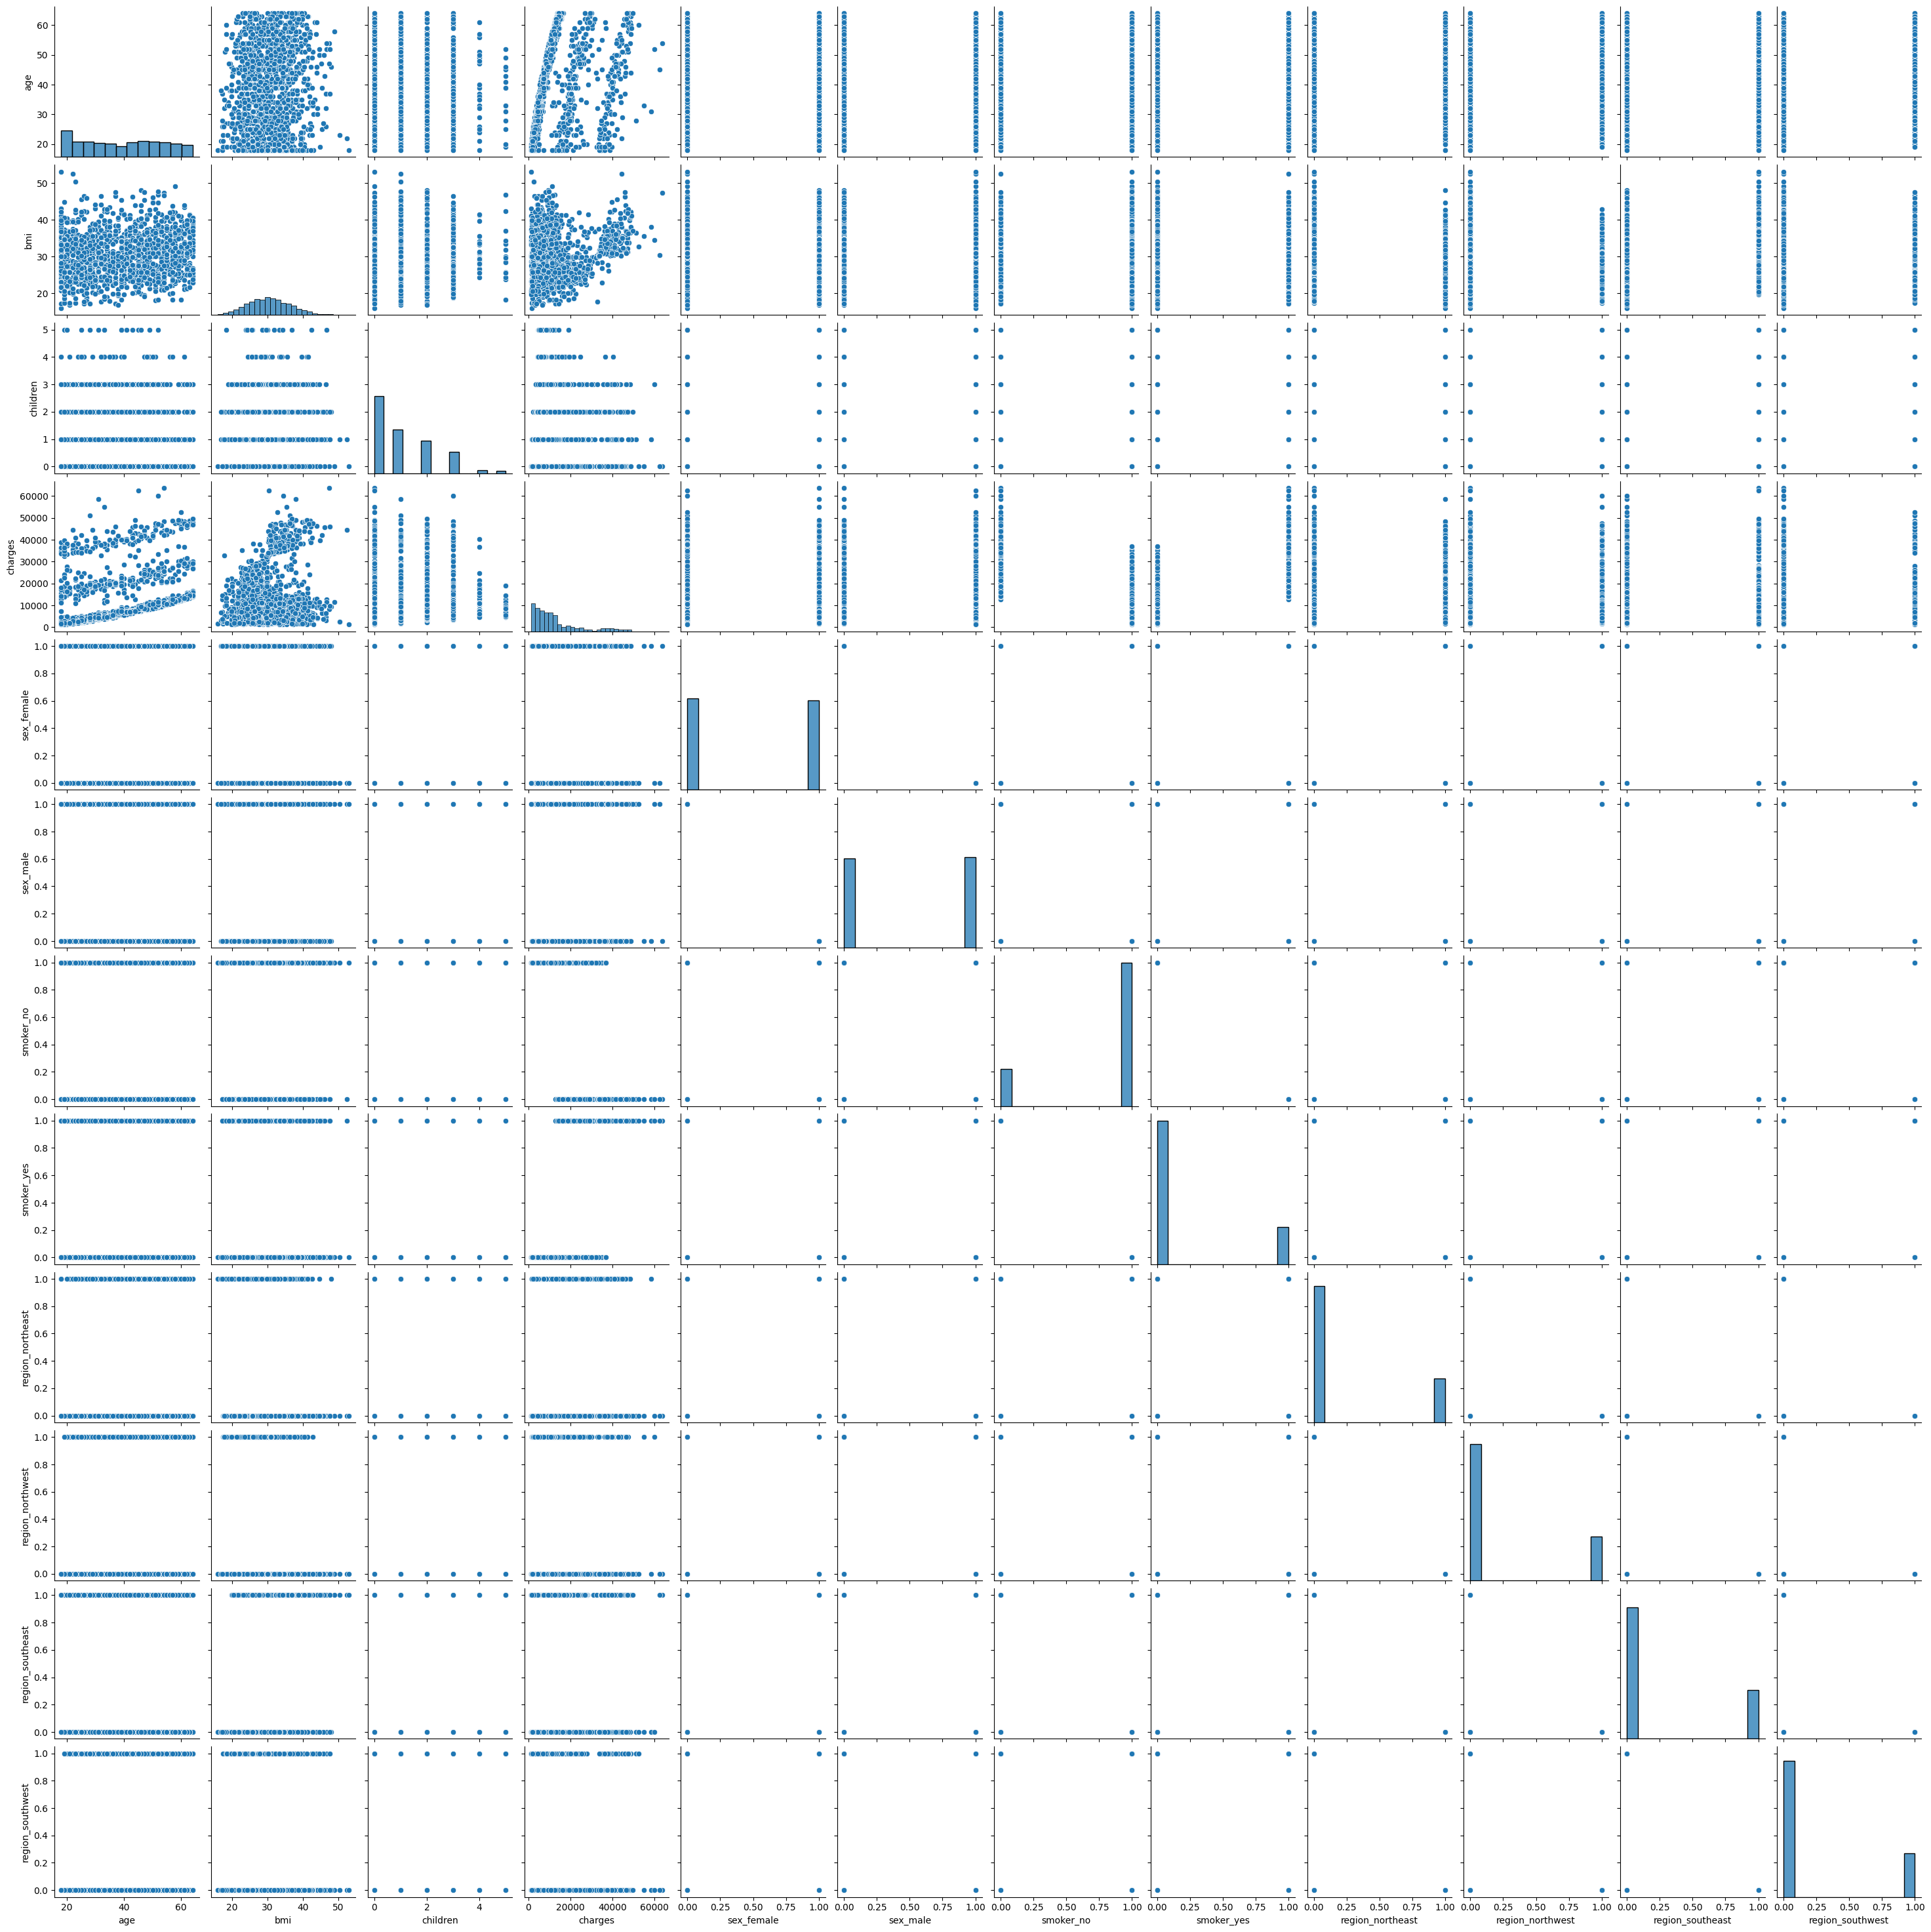

In [13]:
sns.pairplot(df_new)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:

y = df_new["charges"]
X = df_new.drop(["charges"], axis=1)
models = {
"lr": LinearRegression,
"rf": RandomForestRegressor,
"gb": GradientBoostingRegressor
}
scores = []
niter = 100
for name, model in models.items():
    regr = model()
    for i in range(niter):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
        regr.fit(X_train, y_train)
        predict_test = regr.predict(X_test)
        score = r2_score(y_test, predict_test)
        scores.append([name, score])
scores_df = pd.DataFrame(scores).rename(columns={0: "Model", 1: "R2Score"})
scores_df.groupby("Model")["R2Score"].mean()

Model
gb    0.855372
lr    0.750360
rf    0.839893
Name: R2Score, dtype: float64

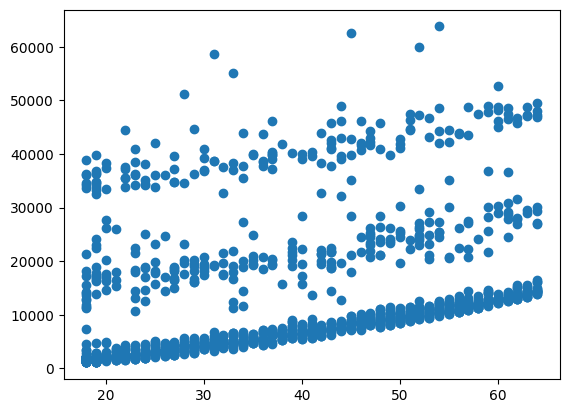

In [17]:
plt.scatter(df['age'], df['charges'])

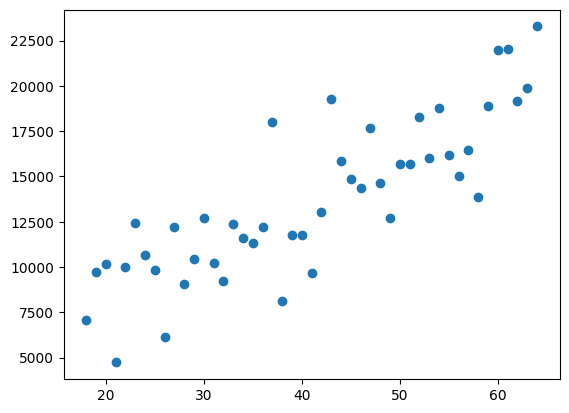

In [20]:
atoc_df = df.groupby("age")["charges"].mean().reset_index()
plt.scatter(atoc_df['age'], atoc_df['charges'])

'age'

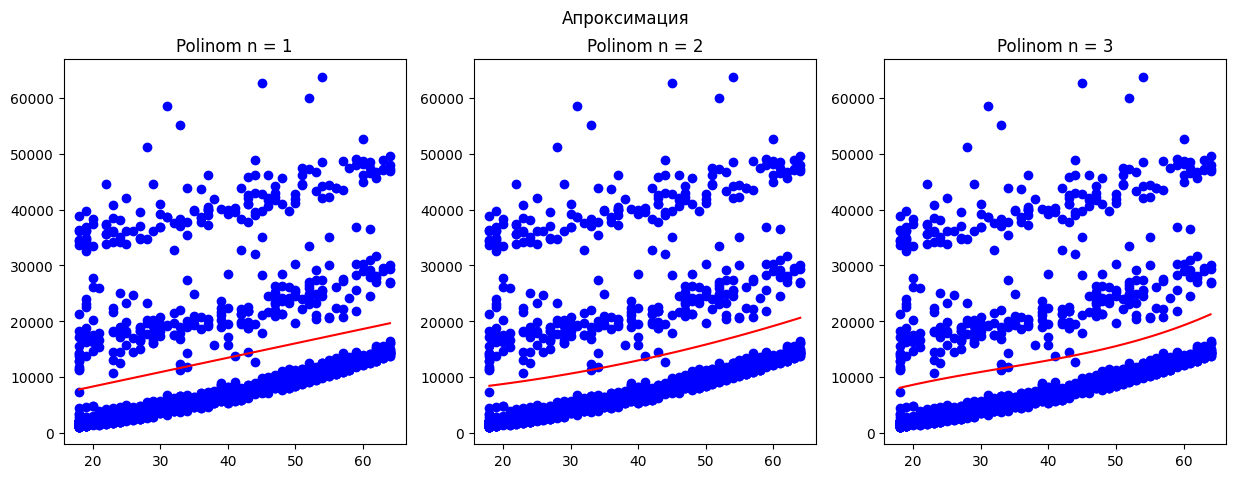

'bmi'

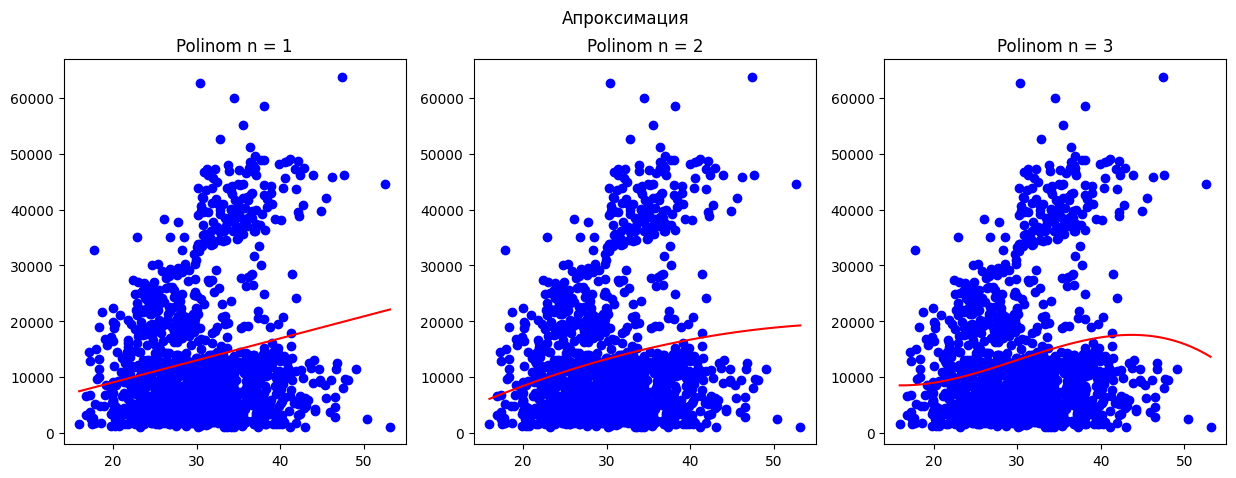

'children'

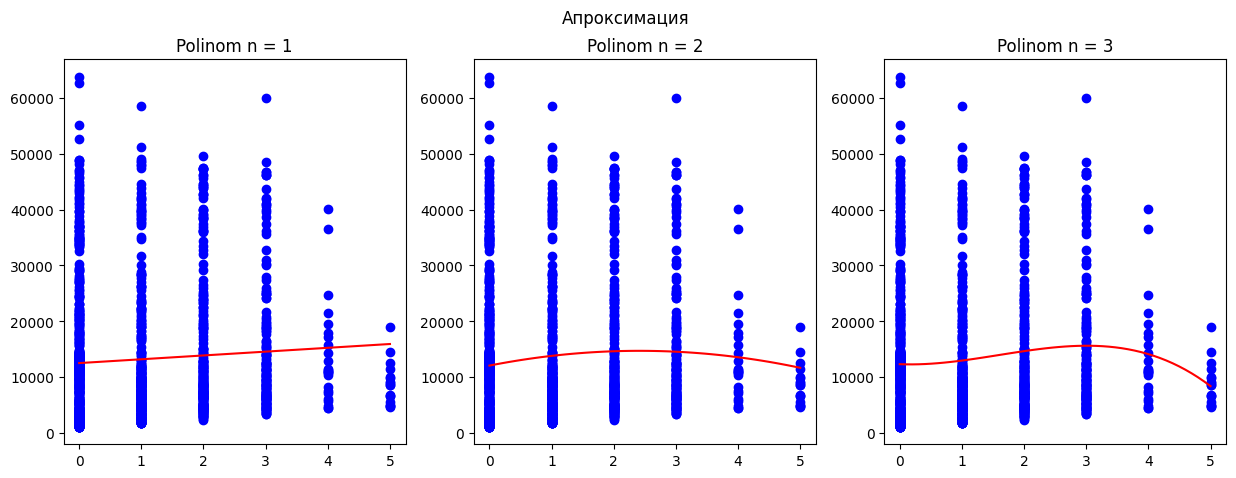

In [25]:
def show_regularisation(x_coords: np.array, y_coords: np.array, polynom_range: list=range(1, 10)):
    degs = [*polynom_range]
    degs_dict = {}
    min_x, max_x = x_coords.min(), x_coords.max()
    for deg in degs:
        coafs = np.polyfit(x_coords, y_coords, deg=deg)
        new_x_coords = np.linspace(min_x, max_x, 50)
        new_y_coords = np.polyval(coafs, new_x_coords)
        degs_dict[deg] = {'x': new_x_coords, 'y': new_y_coords}
        ndegs = len(degs)
        n_cols = 3
        n_rows = ndegs // n_cols if ndegs % n_cols == 0 else ndegs // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_cols, 5*n_rows))
    deg_ind = 0
    for i in range(n_rows):
        for j in range(n_cols):
            if deg_ind >= len(degs):
                break
            ndeg = degs[deg_ind]
            ax = axes[i][j] if n_rows > 1 else axes[j]
            ax.plot(x_coords, y_coords, 'bo')
            ax.plot(degs_dict[ndeg]['x'], degs_dict[ndeg]['y'], c='r')
            ax.set_title(f'Polinom n = {ndeg}')
            deg_ind += 1

    fig.suptitle('Апроксимация')

    plt.show()

df = pd.read_csv('https://github.com/stedy/Machine-Learning-with-R-datasets/raw/master/insurance.csv')
X = df.drop(columns=['charges'])
y = df['charges']
numeric = ['age', 'bmi', 'children']
for col in numeric:
    display(col)
    x = np.array(X[col])
    show_regularisation(x, y, range(1,4))

<Axes: >

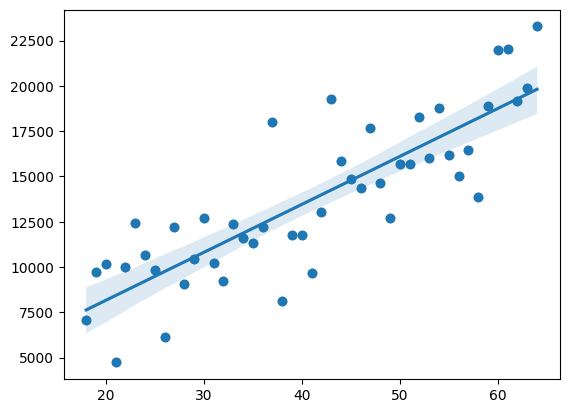

In [21]:
atoc_df = df.groupby("age")["charges"].mean().reset_index()
plt.scatter(atoc_df['age'], atoc_df['charges'])
x = atoc_df.age.to_numpy()
y = atoc_df.charges.to_numpy()
sns.regplot(x=x, y=y)

In [ ]:
|